In [9]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [10]:
# Loading the dataset

class FashionMNIST(d2l.DataModule):
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize), transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(root=self.root, train=True, transform=trans, download=True)
        self.valid = torchvision.datasets.FashionMNIST(root=self.root, train=False, transform=trans, download=True)

In [11]:
# The images are grayscale and upscaled to 32 x 32 pixels

data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.valid)

# Does reducing the batch_size(for instance, to 1) affect the reading performance?
# --> It does affect the performance
# data = FashionMNIST(batch_size=1, resize=(32, 32))

(60000, 10000)

In [12]:
# Converting the class names into numeric labels

@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

In [13]:
# Reading a minibatch with size batch_size and randomly shuffled the data in training data iterator

@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.valid
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train, num_workers=self.num_workers)

In [14]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


The above result gives us the information that we loaded a batch size of 64 and the images are grayscale(1 representing the number of channels) and they are of size 32 * 32 

In [15]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    raise NotImplementedError

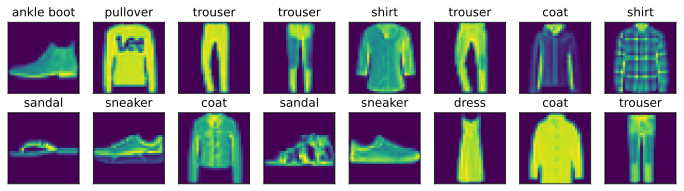

In [16]:
# Visualization

@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=2, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

Yes, it does affect the performance